<a href="https://colab.research.google.com/github/Preethana-c/AD_detection/blob/main/Copy_of_handwriiten_digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import tensorflow as tf
from keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical


In [ ]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images/255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Import necessary libraries
import tensorflow as tf
from keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical

In [ ]:
# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Build the neural network model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))  # Flatten the 28x28 input images
model.add(layers.Dense(units =128, activation='relu'))   # Dense hidden layer with ReLU activation
model.add(layers.Dropout(0.2))                    # Dropout layer to reduce overfitting
model.add(layers.Dense(units = 10, activation='softmax')) # Output layer with 10 units (for 10 digits)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(train_images, train_labels , epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8519 - loss: 0.5207 - val_accuracy: 0.9578 - val_loss: 0.1534
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9514 - loss: 0.1694 - val_accuracy: 0.9657 - val_loss: 0.1172
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9645 - loss: 0.1219 - val_accuracy: 0.9718 - val_loss: 0.0985
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9699 - loss: 0.0964 - val_accuracy: 0.9723 - val_loss: 0.0939
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9761 - loss: 0.0804 - val_accuracy: 0.9743 - val_loss: 0.0871


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Save the trained model for future use
model.save('mnist_model.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9730 - loss: 0.0910


Test accuracy: 0.9760000109672546


In [ ]:
# Select a random index
import numpy as np
random_index = np.random.randint(0, test_images.shape[0])

In [ ]:
# Get the image and label

image = test_images[random_index]
label = test_labels[random_index]

# Reshape the image to match the model's expected input shape
input_image = np.expand_dims(image,axis=0)

Text(0.5, 1.0, 'Original Image\nTrue Label:\xa0[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]')

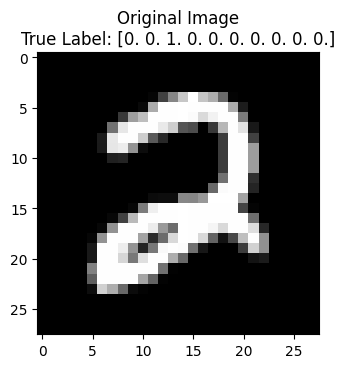

In [ ]:
# Display the original and normalized images
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title(f"Original Image\nTrue Label: {label}")

In [ ]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images/255.0

In [ ]:
# Make a prediction using the model
predictions = model.predict(input_image)

# Get the predicted label
predicted_label = np.argmax(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


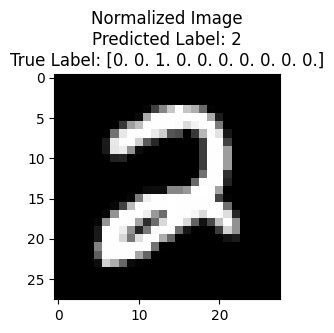

In [ ]:
# Display the normalized image and prediction
plt.subplot(1, 2, 2)
plt.imshow(input_image[0], cmap='gray')
plt.title(f"Normalized Image\nPredicted Label: {predicted_label}\nTrue Label: {label}")

plt.show()